In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [4]:

# 지수 분포의 파라미터 설정


[0.486582880967408,
 0.2498199809168653,
 0.128261854879114,
 0.06585183201381117,
 0.03380945787554912,
 0.017358354458518188,
 0.008912076337239005,
 0.004575612557663811,
 0.0023491978171650274,
 0.0012061183753265814]

In [26]:
def set_range(start, end, interval_range):
    # range 대신 interval_range 사용
    intervals = [(i, min(i + interval_range, end)) for i in range(start, end, interval_range)]
    return intervals

set_range(0, 100, 10)


[(0, 10),
 (10, 20),
 (20, 30),
 (30, 40),
 (40, 50),
 (50, 60),
 (60, 70),
 (70, 80),
 (80, 90),
 (90, 100)]

In [33]:
def get_interval_game_probability(input_mean_value=15,start=0,end=100,interval_range=10):
    
    lambda_param = 1 / input_mean_value
    
    int_ranges=set_range(start,end,interval_range)

    exp_probabilities = []
    
    for (start, end) in int_ranges:
        # 각 구간의 누적확률분포 값 차이를 이용하여 확률을 계산함
        prob = (1 - np.exp(-lambda_param * end)) - (1 - np.exp(-lambda_param * start))
        exp_probabilities.append(prob)

    # 각 구간별 필요 시행 횟수를 구함
    trials = get_num_trials(exp_probabilities)

    return exp_probabilities,trials


get_interval_game_probability(input_mean_value=20,start=0,end=100,interval_range=10)

([0.3934693402873666,
  0.2386512185411911,
  0.14474928102301254,
  0.08779487691181709,
  0.05325028461271386,
  0.03229793025603489,
  0.01958968494554547,
  0.01188174453358426,
  0.007206642350491954,
  0.0043710495391567905],
 [2.5414940825367984,
  4.190215353236927,
  6.908497181695969,
  11.390186252034043,
  18.7792423509647,
  30.961736311668123,
  51.04727323485575,
  84.16272519354857,
  138.76087522669084,
  228.77800652721675])

In [32]:
#시행횟수를 모델링
def get_num_trials(exp_probabilities):
    expected_trials = [1/p if p > 0 else float('inf') for p in exp_probabilities]  # p가 0일 경우, 무한대로 설정
    return expected_trials

In [35]:
class gotcha():
    def __init__(self,start,end,interval_range,input_mean_value):
        self.start = start
        self.end = end
        self.interval_range = interval_range
        self.input_mean_value = input_mean_value

    def set_range(self):
        # range 대신 interval_range 사용
        intervals = [(i, min(i + interval_range, end)) for i in range(start, end, interval_range)]
        return intervals
    
    def get_num_trials(self,exp_probabilities):
        expected_trials = [1/p if p > 0 else float('inf') for p in exp_probabilities]  # p가 0일 경우, 무한대로 설정
        return expected_trials
    
    def get_interval_game_probability(self):
        
        lambda_param = 1 / self.input_mean_value
        
        int_ranges=set_range(self.start,self.end,self.interval_range)

        exp_probabilities = []
        
        for (self.start, self.end) in int_ranges:
            # 각 구간의 누적확률분포 값 차이를 이용하여 확률을 계산함
            prob = (1 - np.exp(-lambda_param * self.end)) - (1 - np.exp(-lambda_param * self.start))
            exp_probabilities.append(prob)

        # 각 구간별 필요 시행 횟수를 구함
        trials = get_num_trials(exp_probabilities)

        return exp_probabilities,trials


    get_interval_game_probability(input_mean_value=20,start=0,end=100,interval_range=10)

In [57]:
import numpy as np

class Gotcha:
    def __init__(self, start, end, interval_range, input_mean_value):
        self.start = start
        self.end = end
        self.interval_range = interval_range
        self.input_mean_value = input_mean_value

    def set_range(self):
        intervals = [(i, min(i + self.interval_range, self.end)) for i in range(self.start, self.end, self.interval_range)]
        return intervals
    
    def get_num_trials(self, exp_probabilities):
        expected_trials = [1/p if p > 0 else float('inf') for p in exp_probabilities]  # p가 0일 경우, 무한대로 설정
        return expected_trials
    
    def get_interval_game_probability(self):
        lambda_param = 1 / self.input_mean_value
        int_ranges = self.set_range()
        exp_probabilities = []

        for (interval_start, interval_end) in int_ranges:
            prob = (1 - np.exp(-lambda_param * interval_end)) - (1 - np.exp(-lambda_param * interval_start))
            exp_probabilities.append(prob)

        trials = self.get_num_trials(exp_probabilities)
        return int_ranges,exp_probabilities, trials

gotcha_game = Gotcha(start=0, end=100, interval_range=10, input_mean_value=20)
interval_range,exp_probabilities, trials = gotcha_game.get_interval_game_probability()

df = pd.DataFrame(index=interval_range,data={'p':exp_probabilities,'t':trials})
df

,p,t
"(0, 10)",0.393469,2.541494
"(10, 20)",0.238651,4.190215
"(20, 30)",0.144749,6.908497
"(30, 40)",0.087795,11.390186
"(40, 50)",0.053250,18.779242
"(50, 60)",0.032298,30.961736
"(60, 70)",0.019590,51.047273
"(70, 80)",0.011882,84.162725
"(80, 90)",0.007207,138.760875
"(90, 100)",0.004371,228.778007


지수분포 모델링

In [157]:
import numpy as np
import pandas as pd

class Gotcha:
    def __init__(self, start, end, interval_range, input_mean_value, num_simulations):
        self.start = start
        self.end = end
        self.interval_range = interval_range
        self.input_mean_value = input_mean_value
        self.num_simulations = num_simulations
        self.bonus_range = self.set_range()
        self.exp_probabilities = self.get_exp_distribution_probability()

    def set_range(self):
        intervals = [(i, min(i + self.interval_range, self.end)) for i in range(self.start, self.end, self.interval_range)]
        return intervals
    
    def get_exp_distribution_probability(self):
        lambda_param = 1 / self.input_mean_value
        exp_probabilities = []

        for (interval_start, interval_end) in self.bonus_range:
            prob = (1 - np.exp(-lambda_param * interval_end)) - (1 - np.exp(-lambda_param * interval_start))
            exp_probabilities.append(prob)

        return exp_probabilities
    
    def get_num_trials(self):
        expected_trials = [1/p if p > 0 else float('inf') for p in self.exp_probabilities]  # p가 0일 경우, 무한대로 설정
        return expected_trials
    
    def get_simulated_result(self):
        win_counts = np.zeros(len(self.bonus_range))

        for _ in range(self.num_simulations):
            for i, prob in enumerate(self.exp_probabilities):
                if np.random.rand() < prob:
                    win_counts[i] += 1
        
        # intervals = [f"{start}-{end}" for start, end in self.bonus_range]
        win_rates = win_counts / self.num_simulations

        return win_counts,win_rates

# 인스턴스 생성 및 시뮬레이션 실행하긔

gotcha_game = Gotcha(start=5, end=100, interval_range=10, input_mean_value=17, num_simulations=10000)

profit_range = gotcha_game.set_range()
each_probability = gotcha_game.get_exp_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()
win_counts,win_rates = gotcha_game.get_simulated_result()

# 표로 정리하깅
df = pd.DataFrame({
    'range':profit_range,
    'probability':each_probability,
    'trials_need':num_of_trials_needs,
    'sim_win_counts':win_counts,
    'sim_win_rates':win_rates,
    'sim_profit':win_counts * win_rates
    })

## 시뮬레이션으로 지급될 총 액수 (=구간의 대표값 * 구간 내 당첨자)
mid_points = [(start + end) / 2 for start, end in profit_range]
sim_profit = [count * mid for count, mid in zip(win_counts, mid_points)]

df['range_mid'] = mid_points
df['sim_profit'] = sim_profit

total_expected_payout = np.sum(sim_profit)
print("총 지급액: ",total_expected_payout)
df


총 지급액:  166600.0


,range,probability,trials_need,sim_win_counts,sim_win_rates,sim_profit,range_mid
0,"(5, 15)",0.331381,3.017677,3291.0,0.3291,32910.0,10.0
1,"(15, 25)",0.184018,5.434256,1816.0,0.1816,36320.0,20.0
2,"(25, 35)",0.102186,9.786050,979.0,0.0979,29370.0,30.0
3,"(35, 45)",0.056745,17.622795,628.0,0.0628,25120.0,40.0
4,"(45, 55)",0.031511,31.735265,317.0,0.0317,15850.0,50.0
5,"(55, 65)",0.017498,57.149111,165.0,0.0165,9900.0,60.0
6,"(65, 75)",0.009717,102.914559,112.0,0.0112,7840.0,70.0
7,"(75, 85)",0.005396,185.329333,61.0,0.0061,4880.0,80.0
8,"(85, 95)",0.002996,333.742492,36.0,0.0036,3240.0,90.0
9,"(95, 100)",0.000953,1048.869043,12.0,0.0012,1170.0,97.5


총 지급액:  1423690.0


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,range,exp_probability,gamma_probability,trials_need,sim_win_counts,sim_win_rates,sim_profit,range_mid
0,"(10, 20)",0.25,0.12,4.05,58326.00,0.12,874890.00,15.00
1,"(20, 30)",0.14,0.04,7.29,21952.00,0.04,548800.00,25.00
2,"(30, 40)",0.08,0.00,13.13,0.00,0.00,0.00,35.00
3,"(40, 50)",0.04,0.00,23.65,0.00,0.00,0.00,45.00
4,"(50, 60)",0.02,0.00,42.59,0.00,0.00,0.00,55.00
5,"(60, 70)",0.01,0.00,76.69,0.00,0.00,0.00,65.00
6,"(70, 80)",0.01,0.00,138.11,0.00,0.00,0.00,75.00
7,"(80, 90)",0.00,0.00,248.70,0.00,0.00,0.00,85.00
8,"(90, 100)",0.00,0.00,447.86,0.00,0.00,0.00,95.00


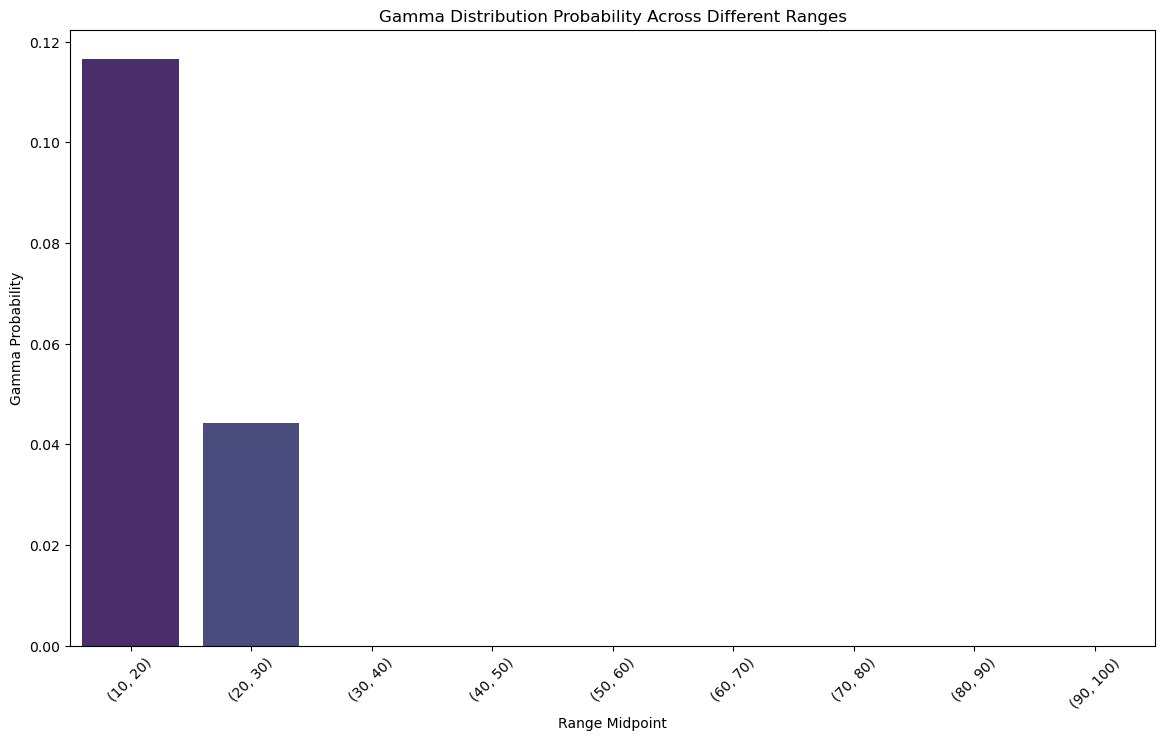

In [268]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
pd.options.display.float_format = '{:.2f}'.format


class Gotcha:
    def __init__(self, start, end, interval_range, input_mean_value, num_simulations, alpha):
        self.start = start
        self.end = end
        self.interval_range = interval_range
        self.input_mean_value = input_mean_value
        self.num_simulations = num_simulations
        self.bonus_range = self.set_range()
        self.alpha = alpha  # 감마 분포의 모양 매개변수
        self.beta = self.alpha / self.input_mean_value  # 평균을 유지하기 위해 비율 매개변수 설정
        self.exp_probabilities = self.get_exp_distribution_probability()
        self.gamma_probabilities = self.get_gamma_distribution_probability()

    def set_range(self):
        intervals = [(i, min(i + self.interval_range, self.end)) for i in range(self.start, self.end, self.interval_range)]
        return intervals
    
    def get_exp_distribution_probability(self):
        lambda_param = 1 / self.input_mean_value
        exp_probabilities = []

        for (interval_start, interval_end) in self.bonus_range:
            prob = (1 - np.exp(-lambda_param * interval_end)) - (1 - np.exp(-lambda_param * interval_start))
            exp_probabilities.append(prob)

        return exp_probabilities
    
    def get_gamma_distribution_probability(self):
            gamma_probabilities = []

            for (interval_start, interval_end) in self.bonus_range:
                mid_point = (interval_start + interval_end) / 2
                # 감마 분포의 누적분포함수(CDF)를 사용하여 구간별 확률 계산
                prob = gamma.cdf(mid_point, self.alpha, scale=1/self.beta) - gamma.cdf(interval_start, self.alpha, scale=1/self.beta)
                gamma_probabilities.append(prob)

            return gamma_probabilities
    
    def get_num_trials(self):
        expected_trials = [1/p if p > 0 else float('inf') for p in self.exp_probabilities]  # p가 0일 경우, 무한대로 설정
        return expected_trials
    
    def get_simulated_result(self):
        win_counts = np.zeros(len(self.bonus_range))

        for _ in range(self.num_simulations):
            # for i, prob in enumerate(self.exp_probabilities):
            for i, prob in enumerate(self.gamma_probabilities):
                if np.random.rand() < prob:
                    win_counts[i] += 1
        
        # intervals = [f"{start}-{end}" for start, end in self.bonus_range]
        win_rates = win_counts / self.num_simulations

        return win_counts,win_rates

# 인스턴스 생성 및 시뮬레이션 실행하긔

gotcha_game = Gotcha(start=10, end=100, interval_range=10, input_mean_value=17, num_simulations=500000,alpha=100)

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()
win_counts,win_rates = gotcha_game.get_simulated_result()

# 표로 정리하깅
df = pd.DataFrame({
    'range':profit_range,
    'exp_probability':exp_probability,
    'gamma_probability':gamma_probability,
    'trials_need':num_of_trials_needs,
    'sim_win_counts':win_counts,
    'sim_win_rates':win_rates,
    'sim_profit':win_counts * win_rates
    })

## 시뮬레이션으로 지급될 총 액수 (=구간의 대표값 * 구간 내 당첨자)
mid_points = [(start + end) / 2 for start, end in profit_range]
sim_profit = [count * mid for count, mid in zip(win_counts, mid_points)]

df['range_mid'] = mid_points
df['sim_profit'] = sim_profit

total_expected_payout = np.sum(sim_profit)
print("총 지급액: ",total_expected_payout)

##
plt.figure(figsize=(14, 8))
sns.barplot(x='range', y='gamma_probability', data=df, palette='viridis')
plt.title('Gamma Distribution Probability Across Different Ranges')
plt.xlabel('Range Midpoint')
plt.ylabel('Gamma Probability')
plt.xticks(rotation=45)  # x축 레이블 회전

df

로그노멀분포

In [40]:
a = 0
for i,prob in enumerate(lognorm_probabilities):
    a += prob
a
np.zeros(len(profit_range))


a

0.20161648118702102

In [31]:
profit_range = gotcha_game.set_range()
lognorm_probabilities = gotcha_game.get_lognorm_distribution_probability()

num_simulations=10000

def get_simulated_result():
    
    win_counts = np.zeros(len(profit_range))  # 각 구간별 당첨 횟수를 저장할 배열

    for _ in range(num_simulations):
        random_prob = np.random.random()
        

    return win_counts, win_rates

win_counts, win_rates = get_simulated_result()
len(win_counts)
sum(win_counts)

2017.0

총 지급액:  5585900.0
총 시행:  500000.0
평균 지급액:  11.1718


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,range,exp_probability,gamma_probability,lognorm_probability,trials_need,sim_win_counts,sim_win_rates,sim_profit,range_mid
0,"(5, 10)",0.238651,1.917643e-01,5.394461e-01,4.190215,190598.0,0.381196,1429485.0,7.5
1,"(10, 15)",0.144749,2.564986e-01,4.434756e-01,6.908497,255845.0,0.511690,3198062.5,12.5
2,"(15, 20)",0.087795,4.974939e-02,1.651510e-02,11.390186,49528.0,0.099056,866740.0,17.5
3,"(20, 25)",0.053250,3.891943e-03,1.799941e-04,18.779242,3840.0,0.007680,86400.0,22.5
4,"(25, 30)",0.032298,1.804152e-04,1.413084e-06,30.961736,186.0,0.000372,5115.0,27.5
5,"(30, 35)",0.019590,5.954678e-06,1.105661e-08,51.047273,3.0,0.000006,97.5,32.5
6,"(35, 40)",0.011882,1.548938e-07,9.737988e-11,84.162725,0.0,0.000000,0.0,37.5
7,"(40, 45)",0.007207,3.378501e-09,1.009193e-12,138.760875,0.0,0.000000,0.0,42.5
8,"(45, 50)",0.004371,6.435119e-11,1.243450e-14,228.778007,0.0,0.000000,0.0,47.5
9,"(50, 55)",0.002651,1.100786e-12,2.220446e-16,377.191166,0.0,0.000000,0.0,52.5


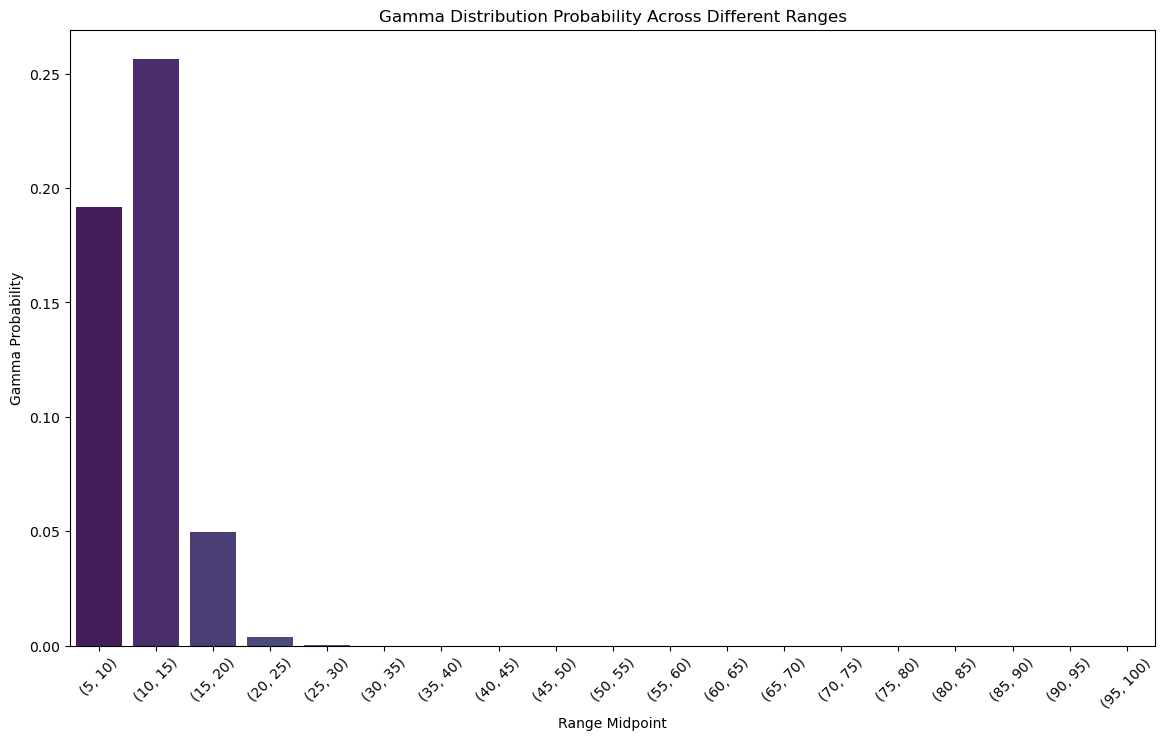

In [119]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
from scipy.stats import lognorm
# pd.options.display.float_format = '{:.2f}'.format


class Gotcha:
    def __init__(self, start, end, interval_range, input_mean_value, num_simulations, alpha,sigma):
        self.start = start
        self.end = end
        self.interval_range = interval_range
        self.input_mean_value = input_mean_value
        self.num_simulations = num_simulations
        self.bonus_range = self.set_range()
        self.alpha = alpha  # 감마 분포의 모양 매개변수
        self.beta = self.alpha / self.input_mean_value  # 평균을 유지하기 위해 비율 매개변수 설정
        self.sigma = sigma  # 로그-노멀 분포의 형태 매개변수
        # 로그-노멀 분포의 mu 값을 계산합니다. 평균을 input_mean_value로 유지하려면,
        # mu는 다음과 같이 계산됩니다.
        self.mu = np.log(input_mean_value) - (sigma ** 2) / 2
        self.bonus_range = self.set_range()
        self.lognorm_probability = self.get_lognorm_distribution_probability()
        self.exp_probabilities = self.get_exp_distribution_probability()
        self.gamma_probabilities = self.get_gamma_distribution_probability()
        self.lognorm_probability = self.get_lognorm_distribution_probability()

    def set_range(self):
        intervals = [(i, min(i + self.interval_range, self.end)) for i in range(self.start, self.end, self.interval_range)]
        return intervals
    
    def get_exp_distribution_probability(self):
        lambda_param = 1 / self.input_mean_value
        exp_probabilities = []

        for (interval_start, interval_end) in self.bonus_range:
            prob = (1 - np.exp(-lambda_param * interval_end)) - (1 - np.exp(-lambda_param * interval_start))
            exp_probabilities.append(prob)

        return exp_probabilities
    
    def get_gamma_distribution_probability(self):
            gamma_probabilities = []

            for (interval_start, interval_end) in self.bonus_range:
                mid_point = (interval_start + interval_end) / 2
                # 감마 분포의 누적분포함수(CDF)를 사용하여 구간별 확률 계산
                prob = gamma.cdf(mid_point, self.alpha, scale=1/self.beta) - gamma.cdf(interval_start, self.alpha, scale=1/self.beta)
                gamma_probabilities.append(prob)

            return gamma_probabilities
    
    def get_lognorm_distribution_probability(self):
            lognorm_probability = []
            # scipy의 lognorm은 scale 파라미터로 e^mu를 받습니다.
            for (interval_start, interval_end) in self.bonus_range:
                prob = lognorm.cdf(interval_end, self.sigma, scale=np.exp(self.mu)) - \
                    lognorm.cdf(interval_start, self.sigma, scale=np.exp(self.mu))
                lognorm_probability.append(prob)
            return lognorm_probability
    
    def get_num_trials(self):
        expected_trials = [1/p if p > 0 else float('inf') for p in self.exp_probabilities]  # p가 0일 경우, 무한대로 설정
        return expected_trials
    
    def get_simulated_result(self):
        win_counts = np.zeros(len(self.bonus_range))

        # 확률을 정규화하여 모든 확률의 합이 1이 되도록 만듭니다.
        total_prob = sum(self.gamma_probabilities)
        normalized_probs = [prob / total_prob for prob in self.gamma_probabilities]

        for _ in range(self.num_simulations):
            # 0과 1 사이에서 랜덤 값을 생성합니다.
            random_value = np.random.random()
            cumulative_prob = 0

            # 생성된 랜덤 값이 어느 구간에 속하는지 확인합니다.
            for i, prob in enumerate(normalized_probs):
                cumulative_prob += prob
                if random_value <= cumulative_prob:
                    win_counts[i] += 1
                    break

        # 당첨 비율을 계산합니다.
        win_rates = win_counts / self.num_simulations

        return win_counts, win_rates


# 인스턴스 생성 및 시뮬레이션 실행하긔

gotcha_game = Gotcha(start=5, end=100, interval_range=5, input_mean_value=10, num_simulations=500000,alpha=10,sigma=0.2)

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()
win_counts,win_rates = gotcha_game.get_simulated_result()

# 표로 정리하깅
df = pd.DataFrame({
    'range':profit_range,
    'exp_probability':exp_probability,
    'gamma_probability':gamma_probability,
    'lognorm_probability':lognorm_probability,
    'trials_need':num_of_trials_needs,
    'sim_win_counts':win_counts,
    'sim_win_rates':win_rates,
    'sim_profit':win_counts * win_rates
    })

## 시뮬레이션으로 지급될 총 액수 (=구간의 대표값 * 구간 내 당첨자)
mid_points = [(start + end) / 2 for start, end in profit_range]
sim_profit = [count * mid for count, mid in zip(win_counts, mid_points)]

df['range_mid'] = mid_points
df['sim_profit'] = sim_profit

total_expected_payout = np.sum(sim_profit)

print("총 지급액: ",total_expected_payout)
print("총 시행: ",df.sim_win_counts.sum())
print("평균 지급액: ",total_expected_payout/df.sim_win_counts.sum())


##
plt.figure(figsize=(14, 8))
sns.barplot(x='range', y='gamma_probability', data=df, palette='viridis')
plt.title('Gamma Distribution Probability Across Different Ranges')
plt.xlabel('Range Midpoint')
plt.ylabel('Gamma Probability')
plt.xticks(rotation=45)  # x축 레이블 회전

df


여기까지 진행됨 : 성공 로그노말

총 지급액:  8993700.0
총 시행:  500000.0
평균 지급액:  17.9874


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,range,exp_probability,gamma_probability,lognorm_probability,trials_need,sim_win_counts,sim_win_rates,sim_profit,range_mid
0,"(5, 10)",0.183712,9.955751e-03,2.263231e-03,5.443311,1176.0,0.002352,8820.0,7.5
1,"(10, 15)",0.139155,1.072055e-01,2.062451e-01,7.186220,103946.0,0.207892,1299325.0,12.5
2,"(15, 20)",0.105405,1.813721e-01,5.260973e-01,9.487196,262572.0,0.525144,4595010.0,17.5
3,"(20, 25)",0.079841,1.271439e-01,2.246856e-01,12.524928,111771.0,0.223542,2514847.5,22.5
4,"(25, 30)",0.060477,5.342711e-02,3.673304e-02,16.535319,18527.0,0.037054,509492.5,27.5
5,"(30, 35)",0.045809,1.607944e-02,3.668148e-03,21.829810,1832.0,0.003664,59540.0,32.5
6,"(35, 40)",0.034699,3.826917e-03,2.862000e-04,28.819557,165.0,0.000330,6187.5,37.5
7,"(40, 45)",0.026283,7.653640e-04,1.990958e-05,38.047371,9.0,0.000018,382.5,42.5
8,"(45, 50)",0.019908,1.338593e-04,1.328927e-06,50.229865,2.0,0.000004,95.0,47.5
9,"(50, 55)",0.015080,2.104615e-05,8.876376e-08,66.313106,0.0,0.000000,0.0,52.5


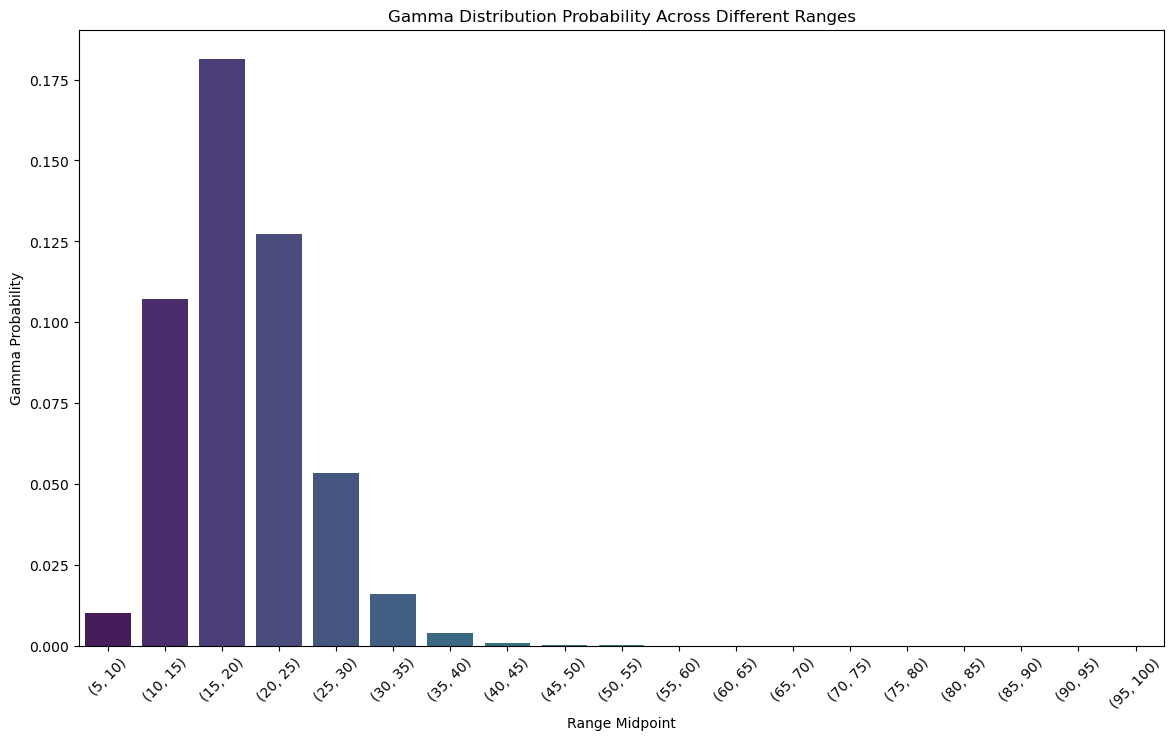

In [283]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
from scipy.stats import lognorm
# pd.options.display.float_format = '{:.2f}'.format


class Gotcha:
    def __init__(self, start, end, interval_range, input_mean_value, num_simulations, alpha,sigma):
        self.start = start
        self.end = end
        self.interval_range = interval_range
        self.input_mean_value = input_mean_value
        self.num_simulations = num_simulations
        self.bonus_range = self.set_range()
        self.alpha = alpha  # 감마 분포의 모양 매개변수
        self.beta = self.alpha / self.input_mean_value  # 평균을 유지하기 위해 비율 매개변수 설정
        self.sigma = sigma  # 로그-노멀 분포의 형태 매개변수
        # 로그-노멀 분포의 mu 값을 계산합니다. 평균을 input_mean_value로 유지하려면,
        # mu는 다음과 같이 계산됩니다.
        self.mu = np.log(input_mean_value) - (sigma ** 2) / 2
        self.bonus_range = self.set_range()
        self.lognorm_probability = self.get_lognorm_distribution_probability()
        self.exp_probabilities = self.get_exp_distribution_probability()
        self.gamma_probabilities = self.get_gamma_distribution_probability()
        self.lognorm_probability = self.get_lognorm_distribution_probability()

    def set_range(self):
        intervals = [(i, min(i + self.interval_range, self.end)) for i in range(self.start, self.end, self.interval_range)]
        return intervals
    
    def get_exp_distribution_probability(self):
        lambda_param = 1 / self.input_mean_value
        exp_probabilities = []

        for (interval_start, interval_end) in self.bonus_range:
            prob = (1 - np.exp(-lambda_param * interval_end)) - (1 - np.exp(-lambda_param * interval_start))
            exp_probabilities.append(prob)

        return exp_probabilities
    
    def get_gamma_distribution_probability(self):
            gamma_probabilities = []

            for (interval_start, interval_end) in self.bonus_range:
                mid_point = (interval_start + interval_end) / 2
                # 감마 분포의 누적분포함수(CDF)를 사용하여 구간별 확률 계산
                prob = gamma.cdf(mid_point, self.alpha, scale=1/self.beta) - gamma.cdf(interval_start, self.alpha, scale=1/self.beta)
                gamma_probabilities.append(prob)

            return gamma_probabilities
    
    def get_lognorm_distribution_probability(self):
            lognorm_probability = []
            # scipy의 lognorm은 scale 파라미터로 e^mu를 받습니다.
            for (interval_start, interval_end) in self.bonus_range:
                prob = lognorm.cdf(interval_end, self.sigma, scale=np.exp(self.mu)) - \
                    lognorm.cdf(interval_start, self.sigma, scale=np.exp(self.mu))
                lognorm_probability.append(prob)
            return lognorm_probability
    
    def get_num_trials(self):
        expected_trials = [1/p if p > 0 else float('inf') for p in self.exp_probabilities]  # p가 0일 경우, 무한대로 설정
        return expected_trials
    
    def get_simulated_result(self):
        win_counts = np.zeros(len(self.bonus_range))

        # 로그-노멀 확률을 정규화합니다.
        total_prob = sum(self.lognorm_probability)
        normalized_probs = [prob / total_prob for prob in self.lognorm_probability]

        for _ in range(self.num_simulations):
            # 0과 1 사이에서 랜덤 값을 생성합니다.
            random_value = np.random.random()
            cumulative_prob = 0

            # 생성된 랜덤 값이 어느 구간에 속하는지 확인합니다.
            for i, prob in enumerate(normalized_probs):
                cumulative_prob += prob
                if random_value <= cumulative_prob:
                    win_counts[i] += 1
                    break

        # 각 구간별 당첨 비율을 계산합니다.
        win_rates = win_counts / self.num_simulations

        return win_counts, win_rates



# 인스턴스 생성 및 시뮬레이션 실행하긔

gotcha_game = Gotcha(start=5, end=100, interval_range=5, input_mean_value=18, num_simulations=500000,alpha=10,sigma=0.2)

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()
win_counts,win_rates = gotcha_game.get_simulated_result()

# 표로 정리하깅
df = pd.DataFrame({
    'range':profit_range,
    'exp_probability':exp_probability,
    'gamma_probability':gamma_probability,
    'lognorm_probability':lognorm_probability,
    'trials_need':num_of_trials_needs,
    'sim_win_counts':win_counts,
    'sim_win_rates':win_rates,
    'sim_profit':win_counts * win_rates
    })

## 시뮬레이션으로 지급될 총 액수 (=구간의 대표값 * 구간 내 당첨자)
mid_points = [(start + end) / 2 for start, end in profit_range]
sim_profit = [count * mid for count, mid in zip(win_counts, mid_points)]

df['range_mid'] = mid_points
df['sim_profit'] = sim_profit

total_expected_payout = np.sum(sim_profit)

print("총 지급액: ",total_expected_payout)
print("총 시행: ",df.sim_win_counts.sum())
print("평균 지급액: ",total_expected_payout/df.sim_win_counts.sum())


##
plt.figure(figsize=(14, 8))
sns.barplot(x='range', y='gamma_probability', data=df, palette='viridis')
plt.title('Gamma Distribution Probability Across Different Ranges')
plt.xlabel('Range Midpoint')
plt.ylabel('Gamma Probability')
plt.xticks(rotation=45)  # x축 레이블 회전

df


총 지급액:  7430000.0
총 시행:  500000.0
평균 지급액:  14.86


c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Owner\miniconda3\envs\stats\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


,range,exp,gamma,lognorm,trials_need,sim_win_counts,sim_win_rates,sim_profit,range_mid
0,"(1, 11)",0.455202,3.991664e-03,3.555757e-01,2.196828,177464.0,0.354928,1064784.0,6.0
1,"(11, 21)",0.233708,4.482024e-01,4.664061e-01,4.278838,233104.0,0.466208,3729664.0,16.0
2,"(21, 31)",0.119990,7.773232e-02,1.336286e-01,8.334037,67068.0,0.134136,1743768.0,26.0
3,"(31, 41)",0.061605,1.453252e-03,3.251122e-02,16.232488,16360.0,0.032720,588960.0,36.0
4,"(41, 51)",0.031629,9.320204e-06,8.385694e-03,31.616570,4237.0,0.008474,194902.0,46.0
5,"(51, 61)",0.016239,3.208196e-08,2.369704e-03,61.580670,1189.0,0.002378,66584.0,56.0
6,"(61, 71)",0.008337,7.357803e-11,7.321178e-04,119.942768,386.0,0.000772,25476.0,66.0
7,"(71, 81)",0.004281,1.268985e-13,2.450417e-04,233.616612,118.0,0.000236,8968.0,76.0
8,"(81, 91)",0.002198,2.220446e-16,8.799809e-05,455.023029,44.0,0.000088,3784.0,86.0
9,"(91, 101)",0.001128,0.000000e+00,3.361379e-05,886.263842,19.0,0.000038,1824.0,96.0


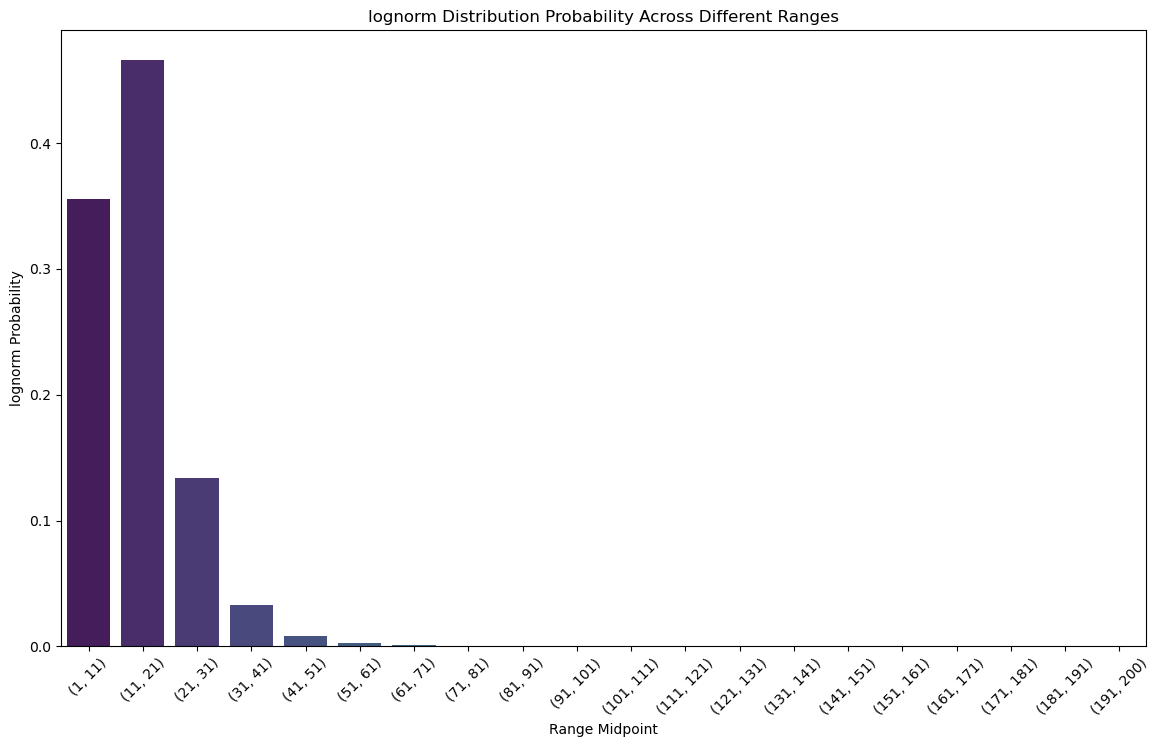

In [300]:
import numpy as np
import pandas as pd
from scipy.stats import gamma
from scipy.stats import lognorm
# pd.options.display.float_format = '{:.2f}'.format


class Gotcha:
    def __init__(self, start, end, interval_range, input_mean_value, num_simulations, alpha,sigma):
        self.start = start
        self.end = end
        self.interval_range = interval_range
        self.input_mean_value = input_mean_value
        self.num_simulations = num_simulations
        self.bonus_range = self.set_range()
        self.alpha = alpha  # 감마 분포의 모양 매개변수
        # self.beta = self.alpha / self.input_mean_value  # 평균을 유지하기 위해 비율 매개변수 설정
        self.beta = self.alpha / self.input_mean_value  # 평균을 유지하기 위해 비율 매개변수 설정
        self.sigma = sigma  # 로그-노멀 분포의 형태 매개변수
        # 로그-노멀 분포의 mu 값을 계산합니다. 평균을 input_mean_value로 유지하려면,
        # mu는 다음과 같이 계산됩니다.
        self.mu = np.log(input_mean_value) - (sigma ** 2) / 2
        self.bonus_range = self.set_range()
        self.lognorm_probability = self.get_lognorm_distribution_probability()
        self.exp_probabilities = self.get_exp_distribution_probability()
        self.gamma_probabilities = self.get_gamma_distribution_probability()
        self.lognorm_probability = self.get_lognorm_distribution_probability()

    def set_range(self):
        intervals = [(i, min(i + self.interval_range, self.end)) for i in range(self.start, self.end, self.interval_range)]
        return intervals
    
    def get_exp_distribution_probability(self):
        lambda_param = 1 / self.input_mean_value
        exp_probabilities = []

        for (interval_start, interval_end) in self.bonus_range:
            prob = (1 - np.exp(-lambda_param * interval_end)) - (1 - np.exp(-lambda_param * interval_start))
            exp_probabilities.append(prob)

        return exp_probabilities
    
    def get_gamma_distribution_probability(self):
            gamma_probabilities = []

            for (interval_start, interval_end) in self.bonus_range:
                mid_point = (interval_start + interval_end) / 2
                # 감마 분포의 누적분포함수(CDF)를 사용하여 구간별 확률 계산
                prob = gamma.cdf(mid_point, self.alpha, scale=1/self.beta) - gamma.cdf(interval_start, self.alpha, scale=1/self.beta)
                gamma_probabilities.append(prob)

            return gamma_probabilities
    
    def get_lognorm_distribution_probability(self):
            lognorm_probability = []
            # scipy의 lognorm은 scale 파라미터로 e^mu를 받습니다.
            for (interval_start, interval_end) in self.bonus_range:
                prob = lognorm.cdf(interval_end, self.sigma, scale=np.exp(self.mu)) - \
                    lognorm.cdf(interval_start, self.sigma, scale=np.exp(self.mu))
                lognorm_probability.append(prob)
            return lognorm_probability
    
    def get_num_trials(self):
        expected_trials = [1/p if p > 0 else float('inf') for p in self.exp_probabilities]  # p가 0일 경우, 무한대로 설정
        return expected_trials
    
    def get_simulated_result(self, distribution_key):
        win_counts = np.zeros(len(self.bonus_range))
        
        # 분포 선택
        if distribution_key == 'exp':
            probabilities = self.exp_probabilities
        elif distribution_key == 'gamma':
            probabilities = self.gamma_probabilities
        elif distribution_key == 'lognorm':
            probabilities = self.lognorm_probability
        else:
            raise ValueError("Invalid distribution key. Choose 'exp', 'gamma', or 'lognorm'.")

        # 확률을 정규화합니다.
        total_prob = sum(probabilities)
        normalized_probs = [prob / total_prob for prob in probabilities]

        for _ in range(self.num_simulations):
            # 0과 1 사이에서 랜덤 값을 생성합니다.
            random_value = np.random.random()
            cumulative_prob = 0

            # 생성된 랜덤 값이 어느 구간에 속하는지 확인합니다.
            for i, prob in enumerate(normalized_probs):
                cumulative_prob += prob
                if random_value <= cumulative_prob:
                    win_counts[i] += 1
                    break

        # 당첨 비율을 계산합니다.
        win_rates = win_counts / self.num_simulations

        return win_counts, win_rates



def get_sim(profit_range,exp_probability,gamma_probability,lognorm_probability,num_of_trials_needs,win_counts,win_rates,sim_dist):
    # 표로 정리하깅
    df = pd.DataFrame({
        'range':profit_range,
        'exp':exp_probability,
        'gamma':gamma_probability,
        'lognorm':lognorm_probability,
        'trials_need':num_of_trials_needs,
        'sim_win_counts':win_counts,
        'sim_win_rates':win_rates,
        'sim_profit':win_counts * win_rates
        })

    ## 시뮬레이션으로 지급될 총 액수 (=구간의 대표값 * 구간 내 당첨자)
    mid_points = [(start + end) / 2 for start, end in profit_range]
    sim_profit = [count * mid for count, mid in zip(win_counts, mid_points)]

    df['range_mid'] = mid_points
    df['sim_profit'] = sim_profit

    total_expected_payout = np.sum(sim_profit)

    print("총 지급액: ",total_expected_payout)
    print("총 시행: ",df.sim_win_counts.sum())
    print("평균 지급액: ",total_expected_payout/df.sim_win_counts.sum())


    plt.figure(figsize=(14, 8))
    sns.barplot(x='range', y=f'{sim_dist}', data=df, palette='viridis')
    plt.title(f'{sim_dist} Distribution Probability Across Different Ranges')
    plt.xlabel('Range Midpoint')
    plt.ylabel(f'{sim_dist} Probability')
    plt.xticks(rotation=45)  # x축 레이블 회전

    return df


# 인스턴스 생성 및 시뮬레이션 실행하긔
# 매개변수 정의
gotcha_game = Gotcha(start=1, end=200, interval_range=10, 
                     input_mean_value=15, #exp & all
                     num_simulations=500000,
                     alpha=12,#gamma
                     sigma=0.5 #log-norm
                     )

profit_range = gotcha_game.set_range()
exp_probability = gotcha_game.get_exp_distribution_probability()
gamma_probability = gotcha_game.get_gamma_distribution_probability()
lognorm_probability = gotcha_game.get_lognorm_distribution_probability()
num_of_trials_needs = gotcha_game.get_num_trials()

#'exp', 'gamma','lognorm'
sim_dist = 'lognorm'
win_counts,win_rates = gotcha_game.get_simulated_result(sim_dist)

df = get_sim(profit_range,exp_probability,gamma_probability,lognorm_probability,num_of_trials_needs,win_counts,win_rates,sim_dist)

df